In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [3]:
df=pd.read_csv('D:/sonar.all-data.csv')
print(df.shape)
df.head()

(207, 61)


,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [4]:
df.isnull().sum()

0.0200    0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
0.0986    0
0.1539    0
0.1601    0
0.3109    0
0.2111    0
0.1609    0
0.1582    0
0.2238    0
0.0645    0
0.0660    0
0.2273    0
0.3100    0
0.2999    0
0.5078    0
0.4797    0
0.5783    0
0.5071    0
0.4328    0
0.5550    0
0.6711    0
0.6415    0
0.7104    0
0.8080    0
0.6791    0
0.3857    0
         ..
0.2604    0
0.5121    0
0.7547    0
0.8537    0
0.8507    0
0.6692    0
0.6097    0
0.4943    0
0.2744    0
0.0510    0
0.2834    0
0.2825    0
0.4256    0
0.2641    0
0.1386    0
0.1051    0
0.1343    0
0.0383    0
0.0324    0
0.0232    0
0.0027    0
0.0065    0
0.0159    0
0.0072    0
0.0167    0
0.0180    0
0.0084    0
0.0090    0
0.0032    0
R         0
Length: 61, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
0.0200    207 non-null float64
0.0371    207 non-null float64
0.0428    207 non-null float64
0.0207    207 non-null float64
0.0954    207 non-null float64
0.0986    207 non-null float64
0.1539    207 non-null float64
0.1601    207 non-null float64
0.3109    207 non-null float64
0.2111    207 non-null float64
0.1609    207 non-null float64
0.1582    207 non-null float64
0.2238    207 non-null float64
0.0645    207 non-null float64
0.0660    207 non-null float64
0.2273    207 non-null float64
0.3100    207 non-null float64
0.2999    207 non-null float64
0.5078    207 non-null float64
0.4797    207 non-null float64
0.5783    207 non-null float64
0.5071    207 non-null float64
0.4328    207 non-null float64
0.5550    207 non-null float64
0.6711    207 non-null float64
0.6415    207 non-null float64
0.7104    207 non-null float64
0.8080    207 non-null float64
0.6791    207 non-null floa

In [5]:
df.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


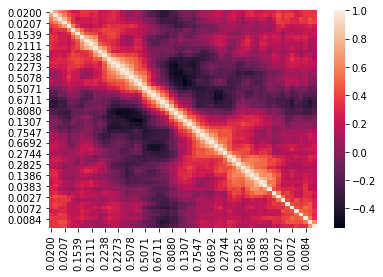

In [7]:
import seaborn as sns
heat_map = sns.heatmap(df.corr())

In [10]:
#One hot encoding
df1 = df.iloc[:,60]
df1 = pd.concat([df,pd.get_dummies(df.iloc[:,60])], axis=1)
df1.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R,M,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R,0,1
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,0,1
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R,0,1
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R,0,1
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R,0,1


In [11]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [14]:
# split into input (X) and output (Y) variables
X = df.iloc[:,0:60].astype(float)

y = df1.iloc[:,61:] 

In [10]:
# encode class values as integers
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

In [21]:
#define model with 3 hidden layers of 10 nodes and relu as activation function
# and use MSE as loss metrics and adam as optimizer
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=60))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='linear'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [22]:
import warnings
warnings.filterwarnings('ignore')
scaler = StandardScaler()
# fit scaler with train data
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#train model
model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
144/144 [==============================] - 0s 1ms/step - loss: 1.1665
Epoch 2/100
144/144 [==============================] - 0s 118us/step - loss: 0.8523
Epoch 3/100
144/144 [==============================] - 0s 97us/step - loss: 0.6511
Epoch 4/100
144/144 [==============================] - 0s 125us/step - loss: 0.5269
Epoch 5/100
144/144 [==============================] - 0s 118us/step - loss: 0.4441
Epoch 6/100
144/144 [==============================] - 0s 104us/step - loss: 0.3913
Epoch 7/100
144/144 [==============================] - 0s 146us/step - loss: 0.3516
Epoch 8/100
144/144 [==============================] - 0s 104us/step - loss: 0.3291
Epoch 9/100
144/144 [==============================] - 0s 104us/step - loss: 0.3105
Epoch 10/100
144/144 [==============================] - 0s 125us/step - loss: 0.2939
Epoch 11/100
144/144 [==============================] - 0s 139us/step - loss: 0.2805
Epoch 12/100
144/144 [==============================] - 0s 132us/step - loss:

In [26]:
#perform evaluation on train and test set
y_train_predicted = model.predict(X_train_scaled)
y_test_predicted = model.predict(X_test_scaled)

MSE_train = mean_squared_error(y_train, y_train_predicted)
MSE_test = mean_squared_error(y_test, y_test_predicted)

print('MSE on train set = {}'.format(MSE_train))
print('MSE on test set = {}'. format(MSE_test))

MSE on train set = 0.047044333070516586
MSE on test set = 0.2110338807106018


In [27]:
model.save("Sonar_data")